In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ds_functions import *

## Data Cleaning

In [2]:
maternal_risk = pd.read_csv('maternal_risk.csv')

### Preview Dataset

In [3]:
maternal_risk.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [5]:
# Data type and missing data check to identify data cleaning
missing_data_check(maternal_risk)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
None
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


### Renaming columns
To match naming conventions and convenience 

In [33]:
#Dict for renaming columns to pass into .rename
mapped_columns = {'Age':'age', 'SystolicBP': 'systolic_bp', 'DiastolicBP': 'diastolic_bp', 'BS': 'blood_sugar', 'HeartRate': 'heart_rate', 'RiskLevel': 'risk_level', 'BodyTemp': 'body_temp'}
maternal_risk.rename(columns=mapped_columns, inplace=True)
print(maternal_risk.columns)

Index(['age', 'systolic_bp', 'diastolic_bp', 'blood_sugar', 'body_temp',
       'heart_rate', 'risk_level'],
      dtype='object')


### Columns for EDA (Metadata)

--- Metadata on columns for maternal risk in Bangladesh (All patients are women) ---<br>
age = Age of patient in years during pregnancy<br>
systolic_bp = Systolic blood pressure of patient in mmHg (pressure in your arteries when the heart beats)<br>
diastolic_bp = Diastolic blood pressure of patient in mmHg (pressure in your arteries when the heart relaxes)<br>
blood_sugar = Blood glucose levels is in terms of a molar concentration, mmol/L<br>
body_temp = Body temperature in F<br>
heart_rate = A normal resting heart rate in beats per minute<br>
risk level = Predicted Risk Intensity Level during pregnancy considering the previous attributes

In [32]:
# Variables to hold column names for future lookups in the dataset
age = 'age'
systolic_bp = 'systolic_bp'
diastolic_bp = 'diastolic_bp'
blood_sugar = 'blood_sugar'
heart_rate = 'heart_rate'
body_temp = 'body_temp'
risk_level = 'risk_level'

In [26]:
#Examine unique values for each column to complete data cleaning
columns = maternal_risk.columns

for column in columns:
    print(f"{column}: {maternal_risk[column].unique()}\n")

age: [25 35 29 30 23 32 42 19 20 48 15 50 10 40 21 18 16 22 49 28 12 60 55 45
 31 17 26 54 44 33 13 34 38 39 63 14 37 51 62 43 65 66 56 70 27 36 59 24
 41 46]

systolic_bp: [130 140  90 120  85 110  70 100  75  95  76  80 115 135 160 129  83  99
  78]

diastolic_bp: [ 80  90  70  85  60  89  75 100  50  65  95  49  63  69  76  68]

blood_sugar: [15.   13.    8.    7.    6.1   7.01 11.    6.9  18.    6.7   7.5   7.2
  7.1   6.4   9.    6.    7.7  12.   16.    7.8   6.8   7.9  17.   19.
 10.    6.3   6.6   6.5   7.6 ]

BodyTemp: [ 98.  100.  102.  101.  103.   98.4  99.   98.6]

heart_rate: [86 70 80 76 78 77 88 90 66 82 60 75 67 65 68  7]

risk_level: ['high risk' 'low risk' 'mid risk']



## Univariate Data Profiling

Initial summary statistics to get a general picture of the data. <br>
Also to generate questions to answer using the data and for potential model building

In [27]:
# Overall picture of the data
maternal_risk.describe(include='all')

,age,systolic_bp,diastolic_bp,blood_sugar,BodyTemp,heart_rate,risk_level
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014
unique,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,low risk
freq,NaN,NaN,NaN,NaN,NaN,NaN,406
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775,NaN
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702,NaN
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,NaN
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,NaN
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000,NaN
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000,NaN


#### Mean age by risk level
Black dashed line is the total age mean

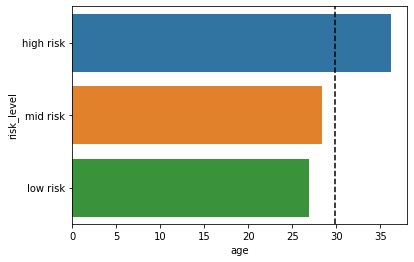

In [28]:
summary_stats_barplot(maternal_risk, np.mean, category=risk_level, value=age)

High risk patients appear to have a higher average age than mid and low risk<br>

#### Mean systolic bp by risk level

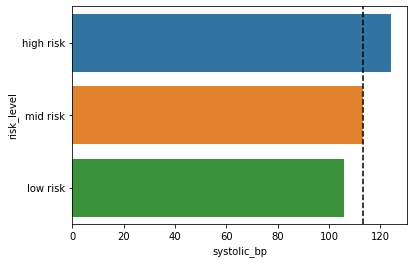

In [29]:
summary_stats_barplot(maternal_risk, np.mean, category=risk_level, value=systolic_bp)

The trend continues where high risk patients have an overall higher mean for each quantitative value examined<br>

#### Mean diastolic bp by risk level

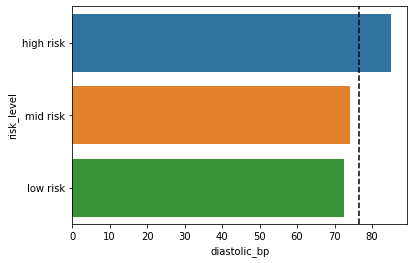

In [30]:
summary_stats_barplot(maternal_risk, np.mean, category=risk_level, value=diastolic_bp)

The trend based on risk level continues for diastolic bp

#### Mean blood sugar by risk level

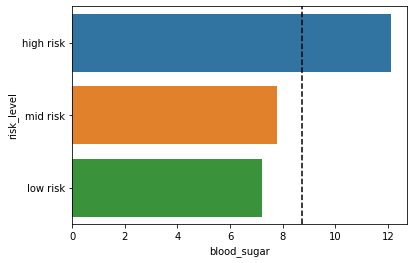

In [31]:
summary_stats_barplot(maternal_risk, np.mean, category=risk_level, value=blood_sugar)

Blood sugar levels are much larger in high risk groups than mid or low<br>
Comparatively high risk blood sugar levels are almost twice as high as low risk groups<br>
Further analysis of blood_sugar should be conducted

#### Mean body temp by risk level

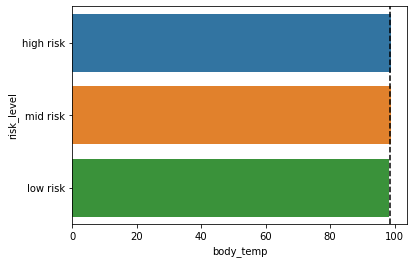

In [34]:
summary_stats_barplot(maternal_risk, np.mean, category=risk_level, value=body_temp)

Body temperature appears to be the healthy human average (98.6 degrees F)<br>
It is likely that patients tested did not have an illness which raised their body temp temperature at the time of recording

#### Mean heart rate by risk level

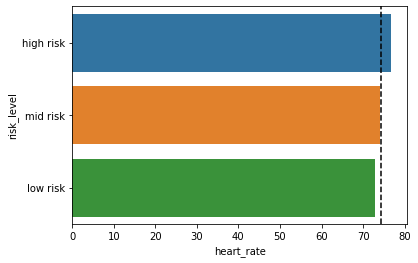

In [35]:
summary_stats_barplot(maternal_risk, np.mean, category=risk_level, value=heart_rate)

Slight elevation of heart rate in high risk patients

### Distributions by risk level

#### Distribution of age

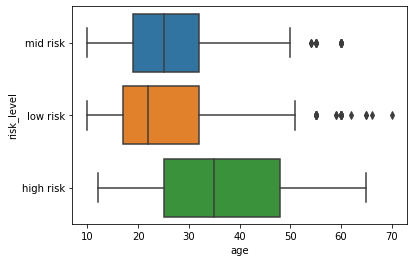

In [36]:
sorted_boxplot(maternal_risk, risk_level, age)

High risk IQR, median and range is much larger than mid and low risk<br>
Age ranges recorded appear to be past normal menopause age. Average menopause age is between 45 and 55 (nia.nih.gov)<br> 
Geriatric pregnacy is considered pregnancy at 35 years of age or older<br>
No clarification on how the age was recorded from the data source (UCI Machine Learning Repository)

#### Distribution of systolic and diastolic bp

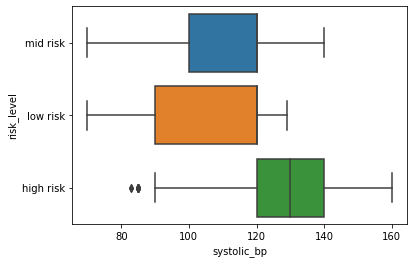

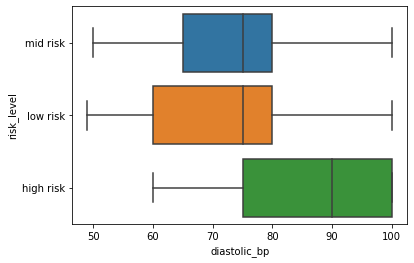

In [40]:
sorted_boxplot(maternal_risk, risk_level, systolic_bp)
sorted_boxplot(maternal_risk, risk_level, diastolic_bp)

Elevated systolic and diastolic bp is also an indicator of heart illness<br>
The median systolic blood pressure for high risk patients is ~130 which is hypertension stage 1<br>
The median diastolic blood pressure for high risk patients is ~90 which is hypertension stage 1<br>
Systolic/Diastolic blood pressure ranges in mmHg: (cdc.gov)<br>
Normal <= 120/80<br>
Elevated 120-129/80 or less<br>
Hypertension (Stage 1) 130-139/80-89<br>
Hypertension (Stage 2) >= 140/90<br>
Hypertension (Stage 3) > 180/120

#### Distribution of blood_sugar

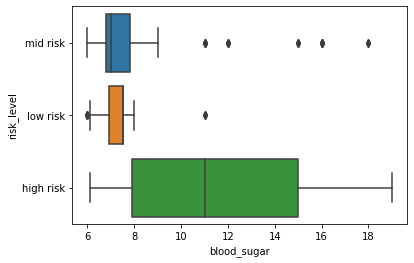

In [41]:
sorted_boxplot(maternal_risk, risk_level, blood_sugar)

Data source doesn't clarify if the blood sugar level was taken while fasting. We'll assume it wasn't since the the ranges of low risk blood sugar levels are between ~7-8 mmol/L which is non fasting.<br>
Median blood sugar levels of high risk group is ~11 mmol/L which is prediabetes on the cusp of diabetes<br>
Blood sugar levels: (mayoclinic.org)<br>
Normal <= 7.8 mmol/L<br>
Prediabetes 7.8 - 11.0 mmol/L<br>
Diabetes > 11.1 mmol/L 2 hours after eating


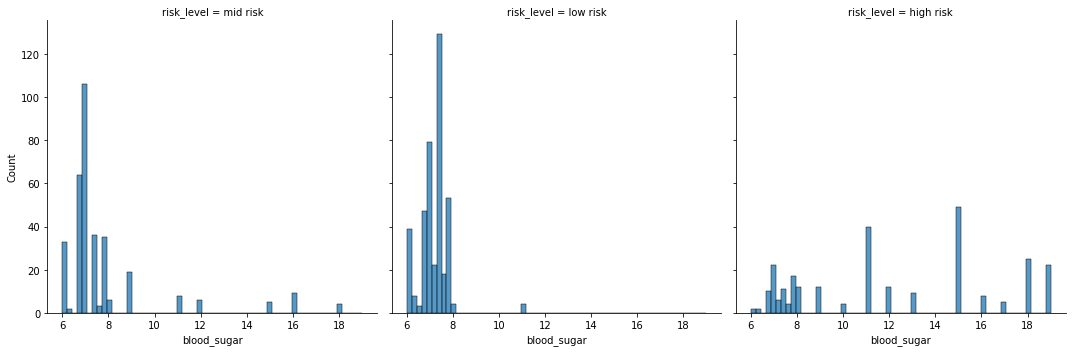

In [46]:
sns.displot(data=maternal_risk, x=blood_sugar, col=risk_level, col_wrap=3)

Skewed right distributions would need to be transformed for statistical analysis

#### Distribution of body temp

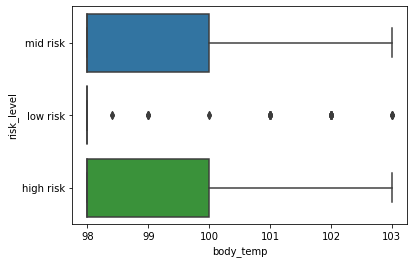

In [43]:
sorted_boxplot(maternal_risk, risk_level, body_temp)

Temperature indicative of a fever is 100.4 F or greater<br>
A majority of temperatures for each risk level is below the fever threshold. It is unlikely patients vitals were taken while sick

#### Distribution of heart rate

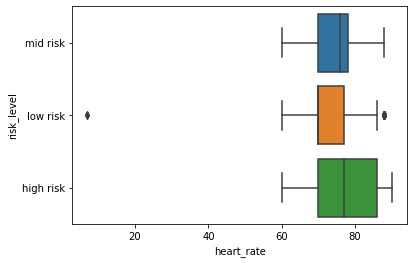

In [44]:
sorted_boxplot(maternal_risk, risk_level, heart_rate)

Outlier of 7 beats per minute is an incorrect measurement due to human error<br>
Elevated heart rates are assoicated with elevated blood pressure (Reule, S., & Drawz, P. E. (2012). Heart rate and blood pressure: any possible implications for management of hypertension?. Current hypertension reports, 14(6), 478–484. https://doi.org/10.1007/s11906-012-0306-3)<br>
There appears to be a trend of higher heart rates and higher blood pressure readings in high risk patients

## Bivariate Data Profiling
Identify trends/relationships between key variables<br>
Blood sugar vs bp, age, heart rate<br>
Heart rate vs bp